=== Training & Tuning (5-fold CV on train) ===

SVM (linear)
Best params: {'clf__C': 0.1}
CV best accuracy: 0.9758

SVM (rbf)
Best params: {'clf__C': 10, 'clf__gamma': 0.01}
CV best accuracy: 0.9758

SVM (poly)
Best params: {'clf__C': 100, 'clf__degree': 3, 'clf__gamma': 'scale'}
CV best accuracy: 0.9670

SVM (sigmoid)
Best params: {'clf__C': 1, 'clf__gamma': 0.01}
CV best accuracy: 0.9714

Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
CV best accuracy: 0.9824

=== Test-set Results (sorted by Accuracy) ===
                 Model                                        Best Params  \
0         SVM (linear)                                    {'clf__C': 0.1}   
1            SVM (rbf)                 {'clf__C': 10, 'clf__gamma': 0.01}   
2           SVM (poly)  {'clf__C': 100, 'clf__degree': 3, 'clf__gamma'...   
3        SVM (sigmoid)                  {'clf__C': 1, 'clf__gamma': 0.01}   
4  Logistic Regression  {'clf__C': 0.1, 'clf__penalty'

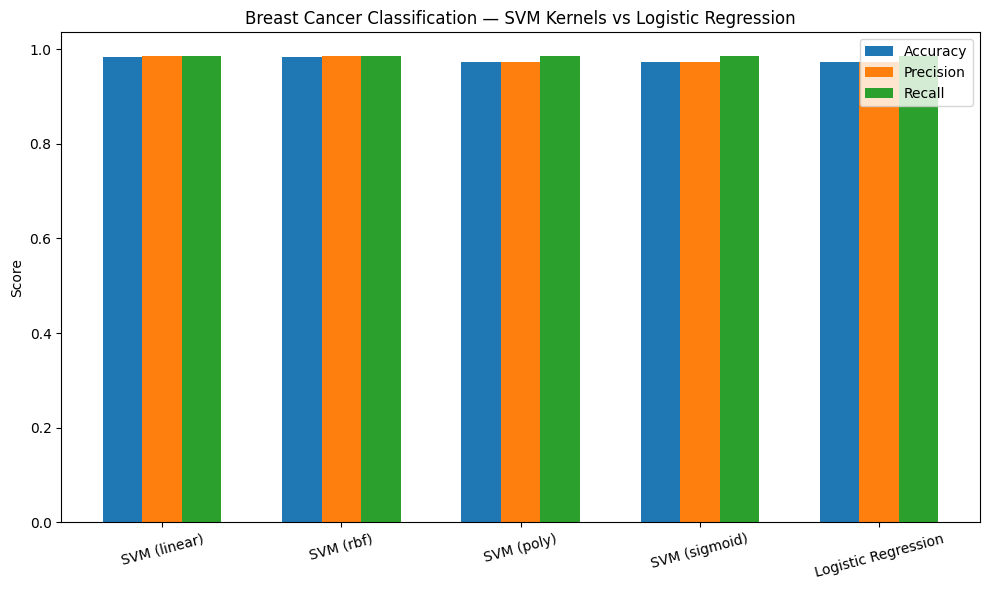

Saved plot: outputs_hw4_p1/p1_metrics_comparison.png

Best SVM (by test accuracy): SVM (linear)


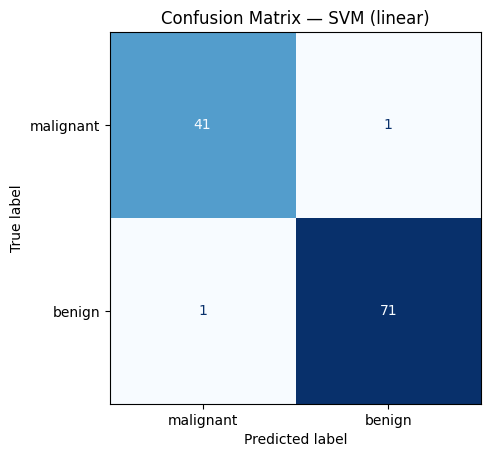

Saved confusion matrix: outputs_hw4_p1/p1_cm_SVM_linear.png


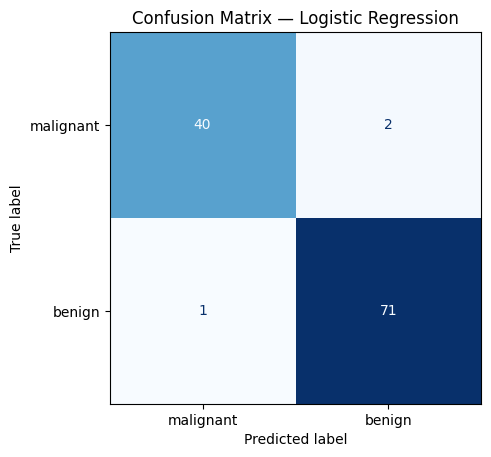

Saved confusion matrix: outputs_hw4_p1/p1_cm_Logistic_Regression.png

=== Detailed classification reports ===

Logistic Regression
              precision    recall  f1-score   support

   malignant     0.9756    0.9524    0.9639        42
      benign     0.9726    0.9861    0.9793        72

    accuracy                         0.9737       114
   macro avg     0.9741    0.9692    0.9716       114
weighted avg     0.9737    0.9737    0.9736       114


SVM (linear)
              precision    recall  f1-score   support

   malignant     0.9762    0.9762    0.9762        42
      benign     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114


SVM (rbf)
              precision    recall  f1-score   support

   malignant     0.9762    0.9762    0.9762        42
      benign     0.9861    0.9861    0.9861        72

    accuracy              

In [1]:
# ============================
# HW4 - Problem 1 (Breast Cancer) — SVM vs Logistic Regression
# Mohammadmilad Sayyad_801419978
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import os

# ---------- Config ----------
RANDOM_STATE = 42
TEST_SIZE = 0.20
CV_FOLDS = 5
OUT_DIR = "outputs_hw4_p1"
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Load data ----------
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names
target_names = dataset.target_names   # ['malignant', 'benign']  (0=malignant, 1=benign)

# ---------- Split (stratified 80/20) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# ---------- Helper: evaluate a fitted estimator on test ----------
def evaluate_and_collect(estimator, X_test, y_test, name):
    y_pred = estimator.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)        # positive class = 1 (benign)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "y_pred": y_pred,
        "report": report
    }

# ---------- Define searches ----------
cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)

searches = []

# SVM - Linear
pipe_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", random_state=RANDOM_STATE))
])
grid_linear = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
}
searches.append(("SVM (linear)", pipe_linear, grid_linear))

# SVM - RBF
pipe_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", random_state=RANDOM_STATE))
])
grid_rbf = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", "auto", 0.01, 0.1]
}
searches.append(("SVM (rbf)", pipe_rbf, grid_rbf))

# SVM - Polynomial
pipe_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="poly", random_state=RANDOM_STATE))
])
grid_poly = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", "auto", 0.01, 0.1],
    "clf__degree": [2, 3]
}
searches.append(("SVM (poly)", pipe_poly, grid_poly))

# SVM - Sigmoid
pipe_sig = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="sigmoid", random_state=RANDOM_STATE))
])
grid_sig = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__gamma": ["scale", "auto", 0.01, 0.1]
}
searches.append(("SVM (sigmoid)", pipe_sig, grid_sig))

# Logistic Regression baseline
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=10000, random_state=RANDOM_STATE))
])
grid_log = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"]
}
searches.append(("Logistic Regression", pipe_log, grid_log))

# ---------- Run grid searches & evaluate ----------
results = []
fitted = {}   # keep fitted best estimators by name

print("=== Training & Tuning (5-fold CV on train) ===")
for name, pipe, grid in searches:
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    gs.fit(X_train, y_train)
    fitted[name] = gs.best_estimator_

    print(f"\n{name}")
    print("Best params:", gs.best_params_)
    print("CV best accuracy: {:.4f}".format(gs.best_score_))

    res = evaluate_and_collect(gs.best_estimator_, X_test, y_test, name)
    results.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "Test Accuracy": res["Accuracy"],
        "Test Precision": res["Precision"],
        "Test Recall": res["Recall"],
        "Test F1": res["F1"]
    })

# ---------- Results table ----------
results_df = pd.DataFrame(results).sort_values("Test Accuracy", ascending=False).reset_index(drop=True)
print("\n=== Test-set Results (sorted by Accuracy) ===")
print(results_df)

# Save CSV
csv_path = os.path.join(OUT_DIR, "p1_results_summary.csv")
results_df.to_csv(csv_path, index=False)
print(f"\nSaved results table to: {csv_path}")

# ---------- Plots: bar chart for Accuracy/Precision/Recall ----------
labels = results_df["Model"].tolist()
acc = results_df["Test Accuracy"].values
prec = results_df["Test Precision"].values
rec = results_df["Test Recall"].values

x = np.arange(len(labels))
bar_w = 0.22

plt.figure(figsize=(10,6))
plt.bar(x - bar_w, acc, width=bar_w, label="Accuracy")
plt.bar(x,          prec, width=bar_w, label="Precision")
plt.bar(x + bar_w,  rec,  width=bar_w, label="Recall")
plt.xticks(x, labels, rotation=15)
plt.ylabel("Score")
plt.title("Breast Cancer Classification — SVM Kernels vs Logistic Regression")
plt.legend()
plt.tight_layout()
plot_path = os.path.join(OUT_DIR, "p1_metrics_comparison.png")
plt.savefig(plot_path, dpi=200)
plt.show()
print(f"Saved plot: {plot_path}")

# ---------- Confusion matrices for (a) best SVM and (b) logistic ----------
# Identify best SVM by accuracy
svm_names = [n for n in results_df["Model"] if n.startswith("SVM")]
best_svm_name = results_df[results_df["Model"].isin(svm_names)].iloc[0]["Model"]

def plot_cm(model_name, colorbar=False):
    est = fitted[model_name]
    y_pred = est.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=target_names
    )
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax=ax, cmap="Blues", colorbar=colorbar)
    ax.set_title(f"Confusion Matrix — {model_name}")
    plt.tight_layout()
    path = os.path.join(OUT_DIR, f"p1_cm_{model_name.replace(' ', '_').replace('(', '').replace(')', '')}.png")
    plt.savefig(path, dpi=200)
    plt.show()
    print(f"Saved confusion matrix: {path}")

print(f"\nBest SVM (by test accuracy): {best_svm_name}")
plot_cm(best_svm_name)
plot_cm("Logistic Regression")

# ---------- Optional: Detailed classification reports ----------
print("\n=== Detailed classification reports ===")
for name in ["Logistic Regression", *svm_names]:
    est = fitted[name]
    y_pred = est.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
